# Spam or Ham?

## Lab Assignment Two: Exploring Text Data 

### Justin Ledford, Luke Wood, Traian Pop 
___

## Business Understanding
Business Understanding (10 points total).  
[10 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Why is this data important and how will you know if you have gathered useful knowledge from the dataset? Be specific and use your own words to describe the aspects of the data.


### Data Background
SMS messages play a huge role in a peron's life, and the confidentiality and integrity of said messages are of the highest priority to mobile carriers around the world. Due to this fact, many unlawful individuals and groups try and take advatange of the average consumer by flooding their inbox with spam, and while the majority of people successfully avoid it, there are people out there affected negatively by falling for false messages.  

The data we selected is a compilation of 5574 SMS messages acquired from a variety of different sources, broke down in the following way: 452 of the messages came from the Grumbletext Web Site, 3375 of the messages were taken from the NUS SMS Corpus (database with legitimate message from the University of Singapore), 450 messages collected from Caroline Tag's PhD Thesis, and the last 1324 messages were from the SMS Spam Corpus v.0.1 Big. 

Overall there were 4827 "ham" messages and "747" spam messages.
   
### Purpose
This data was collected initially for studies on deciphering the differences between a spam or ham (legitimate) messages. Uses for this research can involve advanced spam filtering technology or improved datasets for machine learning programs. However, a slight problem with this data set, as with most localized language-based datasets, is that due to the relatively small area of sampling, there are a lot of regional data points (such as slang, acronyms, etc) that can be considering "useless" data if a much more generalized data set is wanted. For our specific project however, we are keeping all this data in order for us to analyze it and get a better understanding of our data.
___

## Data Encoding

### Extracting the Data

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

count_vect = CountVectorizer(stop_words='english')

descriptors_url = 'https://raw.githubusercontent.com/LukeWoodSMU/TextAnalysis/master/data/SMSSpamCollection'
descriptors = requests.get(descriptors_url).text
texts = []


for line in descriptors.splitlines():
    texts.append(line.rstrip().split("\t"))

After the first look at the data we noticed a lot of numbers. Since almost every number was unique we concluded that the numbers were irrelevant to consider as words. We considered grouping all number tokens into one "word" and analyze the precense of words, but we decided to first start by just removing the numbers.

In [2]:
# Remove numbers
texts = list(zip([a for a,b in texts], [re.sub('[0-9-]3+.*', ' ', b) for a,b in texts]))
texts[:10]

[('ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'),
 ('ham', 'Ok lar... Joking wif u oni...'),
 ('spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"),
 ('ham', 'U dun say so early hor... U c already then say...'),
 ('ham', "Nah I don't think he goes to usf, he lives around here though"),
 ('spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"),
 ('ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'),
 ('ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"),
 ('spam',
  'WINNER!! As a valued network customer you have been selected to receivea £

Converting the data from raw text into a sparse encoded bag-of-words representation. 

In [3]:
# Create bag of words
bag_words = count_vect.fit_transform([t[1] for t in texts])

In [4]:
# Words counts per row in pandas dataframe
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [5]:
# print out 10 most common words in our data
df.sum().sort_values()[-10:]

good    243
like    244
know    262
free    268
ll      269
ok      292
lt      316
gt      318
just    368
ur      382
dtype: int64

Converting the data into a sparse encoded tf-idf representation.

In [6]:
# Get tfidf
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf_vect.fit_transform([t[1] for t in texts])
tfidf_df = pd.DataFrame(data=tfidf_mat.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_df.head(n=5)

,00,000,000pes,008704050406,0089,012,0121,0125698789,02,020,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#print out 10 most common words in our data
tfidf_df.sum().sort_values()[-10:]

time     56.945668
know     59.017660
good     59.766063
lt       64.356000
ur       64.382773
gt       64.679294
come     67.380358
just     72.266374
ll       79.736271
ok      103.308348
dtype: float64

When analyzing the top 10 most common words in our data with the TF-IDF representation, our top winners change. Instead of the previous "ur" being #1, it seems that it drops all the way down to #7, while "ok" jumps from #5 to #1. This means that "ok" is a more more relevent word throughout the documents compared to "ur" while "ur" itself just happens to have more individual hits. 
___

Using tf-idf we can see which words are most relevant for ham and spam messages.

In [8]:
tfidf_vect_ham = TfidfVectorizer(stop_words='english')
tfidf_mat_ham = tfidf_vect_ham.fit_transform([t[1] for t in texts if t[0] == 'ham'])
tfidf_df_ham = pd.DataFrame(data=tfidf_mat_ham.toarray(), columns=tfidf_vect_ham.get_feature_names())
tfidf_df_ham.sum().sort_values()[-10:]

home      54.427173
know      54.526118
sorry     55.010803
good      57.433290
lt        62.619921
gt        62.980016
just      63.966590
come      65.946440
ll        77.769828
ok       100.941869
dtype: float64

In [9]:
tfidf_vect_spam = TfidfVectorizer(stop_words='english')
tfidf_mat_spam = tfidf_vect_spam.fit_transform([t[1] for t in texts if t[0] == 'spam'])
tfidf_df_spam = pd.DataFrame(data=tfidf_mat_spam.toarray(), columns=tfidf_vect_spam.get_feature_names())
tfidf_df_spam.sum().sort_values()[-10:]

reply     14.216356
stop      14.292372
claim     15.725948
urgent    15.902412
prize     16.668448
text      17.226986
txt       18.288373
ur        18.304256
mobile    18.412027
free      26.184182
dtype: float64

## Data Visualization

Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. Choose visualizations that you think summarize your data best.
For each target class, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? 

We started out by creating histograms of the relative frequencies of the top 50 most occuring words for the entire data set, just the spam messages, and just the ham messages.


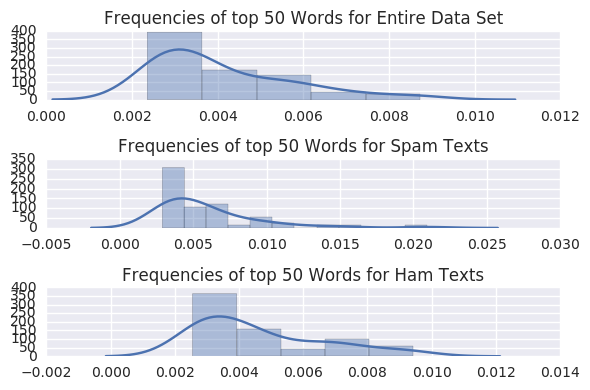

In [10]:
#TODO: what are the y axis labels on these?

#add a column to determine whether a message is spam, or ham
df["spam"] = [t[0] for t in texts]

total_count = df[[x for x in df.columns if x != "spam"]].sum().sum()
spam_count = df[df.spam == "spam"][[x for x in df.columns if x!="spam"]].sum().sum()
ham_count = df[df.spam == "ham"][[x for x in df.columns if x!="spam"]].sum().sum()



f, (a1,a2,a3) = plt.subplots(3)
sns.distplot(df[[x for x in df.columns if x!="spam"]].sum().sort_values()[-50:]/total_count,
             hist=True, ax=a1)
a1.set_title("Frequencies of top 50 Words for Entire Data Set")
sns.distplot(df[df.spam == "spam"][[x for x in df.columns if x!="spam"]].sum().sort_values()[-50:]/spam_count, hist=True, ax=a2)
a2.set_title("Frequencies of top 50 Words for Spam Texts")
sns.distplot(df[df.spam=="ham"][[x for x in df.columns if x!="spam"]].sum().sort_values()[-50:]/ham_count, hist=True, ax=a3)
a3.set_title("Frequencies of top 50 Words for Ham Texts")

plt.tight_layout()
plt.show()


We can see that of the top 50 words occuring in each class, there are wor

### Document Lengths
After analyzing the frequencies and distribution of the top words in the document, we wanted to compare the lengths of the two classes of documents. We thought boxplots, violin plots, and histograms would be the best visualizations for this.

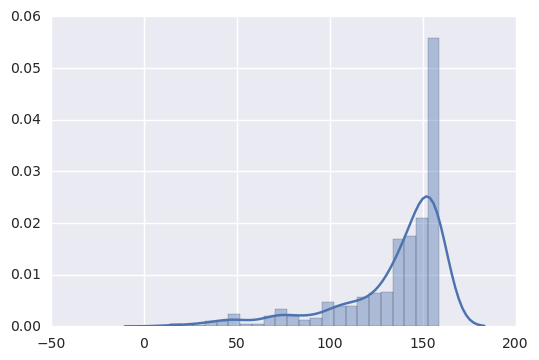

In [11]:
spam_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection") if x.split('\t')[0] == "spam"]
ham_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection") if x.split('\t')[0] == "ham"]
total_lines = [" ".join(x.split("\t")[1:]) for x in open("data/SMSSpamCollection")]

#filter out texts longer than 160, SMS cuts off here
spam_lines = filter(lambda x:len(x) < 160,spam_lines)
ham_lines = filter(lambda x:len(x) < 160,ham_lines)
total_lines = filter(lambda x:len(x) < 160,total_lines)

sns.distplot([len(x) for x in spam_lines]);
plt.show()

In the first graph, we see that the spam texts in our data set tend to be skewed very left (the majority of the points are on the right, with a few trailing towards the left), which indicates that SMS messages typically tend to be longer than their ham (real) counterparts. 

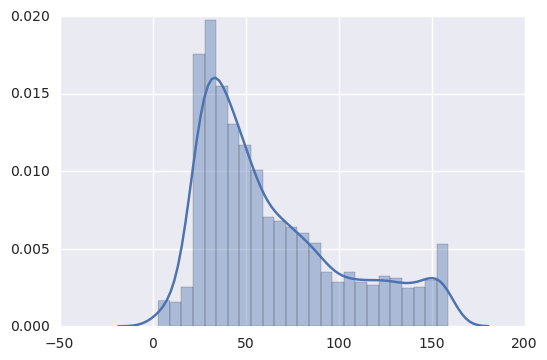

In [12]:
sns.distplot([len(x) for x in ham_lines]);
plt.show()

Coincidentaly, this second graph shows the complete opposite: the ham texts tend to be much shorter in length. It is interesting to see that this graph is practically the reflection of the spam graph in almost every characteristic. They are both unimodal and heavily skewed in their respective directions.

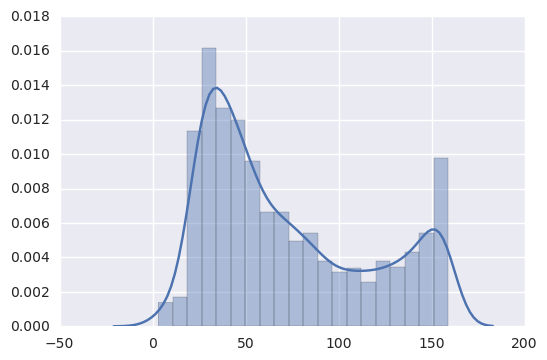

In [13]:
sns.distplot([len(x) for x in total_lines]);
plt.show()

Lastly, we ended up combining both categories of documents into one graph, and it is much easier to examine them here. Both our earlier conclusions from the previous two graphs are even more validated in this comparison.

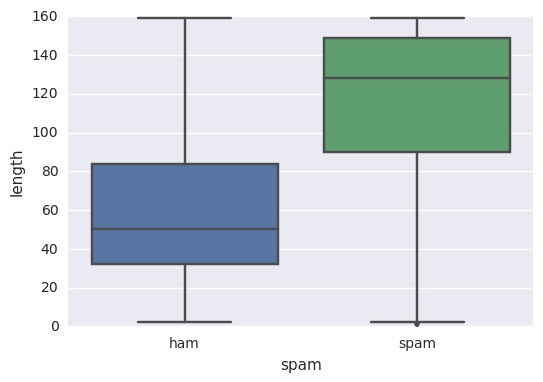

In [14]:
lens = [ [a, len(b)] for a,b in texts if len(b) < 160 ]
df_lens = pd.DataFrame(data=lens)
df_lens.columns = ['spam', 'length']
sns.boxplot(x='spam', y='length', data=df_lens)
plt.show()

In this boxplot, we see another graph depicting the major difference between the two classes of documents and how related document length and class is.

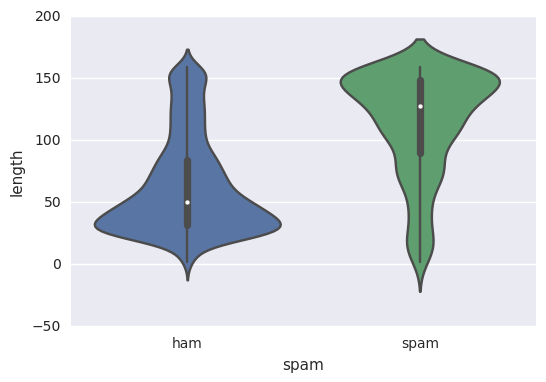

In [15]:
sns.violinplot(x='spam', y='length', data=df_lens)
plt.show()

Finally, our violin graph combines both our histogram and boxplots in order to give a more concise visualization of our document length analysis.
___

## Vocabulary Size

Next we wanted to take a look at the difference between vocabulary sizes so we thought an area proportional venn diagram would be to view this.

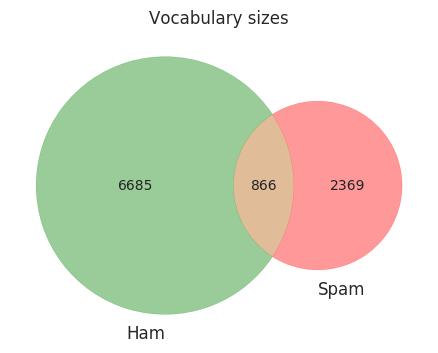

In [20]:
from matplotlib_venn import venn2

count_vect_ham = CountVectorizer(stop_words='english')
bag_words_ham = count_vect_ham.fit_transform([t[1] for t in texts if t[0] == 'ham'])
count_vect_spam = CountVectorizer(stop_words='english')
bag_words_spam = count_vect_spam.fit_transform([t[1] for t in texts if t[0] == 'spam'])

ham_vocab_count = len(count_vect_ham.vocabulary_)
spam_vocab_count = len(count_vect_spam.vocabulary_)
and_vocab_count = len(set(count_vect_ham.vocabulary_.keys()) & \
                      set(count_vect_spam.vocabulary_.keys()))

v = venn2(subsets=(ham_vocab_count, spam_vocab_count, and_vocab_count),
          set_labels = ('Ham', 'Spam'))
v.get_patch_by_id('10').set_color('green')
v.get_patch_by_id('01').set_color('red')
plt.title("Vocabulary sizes")
plt.show()

We can see that there are many words belonging exclusively to each class.

# Numbers

We thought it would be interesting to see the percentage of spam texts that had a number in them and compare that with the number of ham texts that have a number in them.  To do so, we put together a regular expression to replace numbers with "NUMBER_TOKEN" and counted the lines that contained "NUMBER_TOKEN".  

In [16]:
for line in descriptors.splitlines():
    texts.append(line.rstrip().split("\t"))

texts = list(zip([a for a,b in texts], [re.sub('[0-9-]+.*', 'NUMBER_TOKEN', b) for a,b in texts]))

spam_numbers = len([a for a,b in texts if "NUMBER_TOKEN" in b and a=="spam"])
total_spam = len([a for a,b in texts if a=="spam"])
print("Percent of spam texts with a number: %.1f" %(100* spam_numbers/total_spam)+"%")

ham_numbers = len([a for a,b in texts if "NUMBER_TOKEN" in b and a=="ham"])
total_ham = len([a for a,b in texts if a=="ham"])
print("Percent of ham texts with a number: %.1f" %(100 * ham_numbers/total_ham)+"%")


Percent of spam texts with a number: 94.4%
Percent of ham texts with a number: 19.2%


We found that a far higher percentage of the spam texts had numbers in them.  90% of spam texts had numbers in them, while only 18.3% of non-spam texts had numbers in them.  Next, we decided to test specifically for phone numbers.  In order to do so, we required that the number contain at least 3 digits to be changed into the NUMBER_TOKEN.  This fits things in the format 1-800-MUH-SPAM along with 1-800-000-0000

In [17]:
for line in descriptors.splitlines():
    texts.append(line.rstrip().split("\t"))

texts = list(zip([a for a,b in texts], [re.sub('[0-9-]3+.*', 'NUMBER_TOKEN', b) for a,b in texts]))

spam_numbers = len([a for a,b in texts if "NUMBER_TOKEN" in b and a=="spam"])
total_spam = len([a for a,b in texts if a=="spam"])
print("Percent of spam texts with a number: %.1f" %(100* spam_numbers/total_spam)+"%")

ham_numbers = len([a for a,b in texts if "NUMBER_TOKEN" in b and a=="ham"])
total_ham = len([a for a,b in texts if a=="ham"])
print("Percent of ham texts with a number: %.1f" %(100 * ham_numbers/total_ham)+"%")


Percent of spam texts with a number: 77.0%
Percent of ham texts with a number: 12.9%


It turned out other numbers were a pretty neglible part of the numbers showing up.  The numbers were still pretty similar.

# Trie Representation
This lets you look up if a word is in the data set.  I'm not trying to say it's particularly useful, but it's pretty cool.  It should work at http://localhost:8888/files/visuals/trie/index.html as well.  I've also included an iframe but honestly I wouldn't use the iframe since it doesn't do the chart justice (you might have to scroll down to see it)

### REMEMBER It's not about if we should, it's about if we can.
Also, you can check out my data parsing in /visuals/trie/main.js, it's pretty sweet.  I think that another thing to note is the wide variety of words that occur that are not actually words.  For example, what in the world is aaniye, or mmsto.  The trie shows an overview of the language used of texts in an interesting way.

I really reccomend looking at it on http://localhost:8888/files/visuals/trie/index.html for the full screen experience.  

</br>Forked from: http://bl.ocks.org/d3noob/8375092

In [2]:
from IPython.display import IFrame
IFrame('visuals/trie/index.html', width=1080, height=1080)


# Word Clouds
We took the time to create two word clouds: one for spam and one for ham.  

We accomplished this using an online tool at, the source code for the project is at https://github.com/jasondavies/d3-cloud.  There is an interactive session interfact that makes creating a word cloud easily.

These are both depicted below.

###### Ham
![ham](img/ham.png "Ham")
As we can, ham has a lot of words that relate to making plans.  Come, going, just, and want all relate to making plans.  We also see pronouns like I, ur, and Id.  There are lots of abbreviations such as 4, 2, lol, and u.

Spam:
![spam](img/spam.png "Spam")
In the spam word cloud, we see pretty much exactly what I would expect to see.  Words like free, cash, won, and win all make sense.  However, one really interesting thing that showed up was Nokia.

In [18]:
from wordcloud import WordCloud
# Generate a word cloud image
stopwords = ['spam','ham']
querywords = descriptors

result = ' '.join(filter(lambda x: x.lower() not in stopwords, querywords.split()))
wordcloud = WordCloud().generate(result)

# Display the generated image:


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(result),max_font_size=40, relative_scaling=.8).generate(result)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'